# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

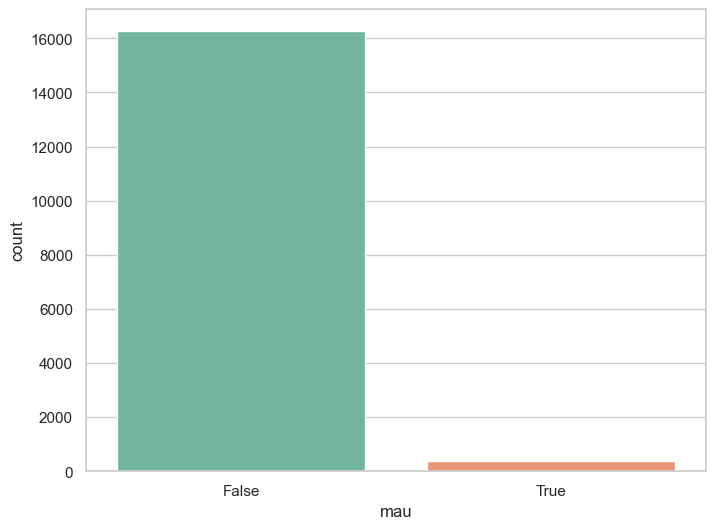

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('base.csv')
df.columns

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.countplot(x='mau', data=df, palette='Set2')

plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [16]:
info_variaveis = pd.DataFrame({
    'Variavel': df.columns,
    'Tipo de Dados': df.dtypes
})

info_variaveis['qtd_categorias'] = [df[var].nunique() for var in df.columns]
print(info_variaveis)

var_qualitativas = info_variaveis[info_variaveis['Tipo de Dados'] == 'object']['Variavel']

df_dummies = pd.get_dummies(df, columns=var_qualitativas, drop_first=True)

print(df_dummies.head())
    

                                    Variavel Tipo de Dados  qtd_categorias
sexo                                    sexo        object               2
posse_de_veiculo            posse_de_veiculo        object               2
posse_de_imovel              posse_de_imovel        object               2
qtd_filhos                        qtd_filhos         int64               8
tipo_renda                        tipo_renda        object               5
educacao                            educacao        object               5
estado_civil                    estado_civil        object               5
tipo_residencia              tipo_residencia        object               6
idade                                  idade       float64            5298
tempo_emprego                  tempo_emprego       float64            3005
possui_celular                possui_celular         int64               1
possui_fone_comercial  possui_fone_comercial         int64               2
possui_fone              

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [ ]:
df_dummies = df_dummies.drop(columns=var_qualitativas)
X = df_dummies.values

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [22]:
tabela_cruzada = pd.crosstab(index=[df['possui_email'], df['posse_de_veiculo']], columns=df['mau'], margins=True, margins_name='Total')
prop_condicional = tabela_cruzada[1] / tabela_cruzada['Total']
print("Tabela Cruzada:")
print(tabela_cruzada)

print("\nProporções Condicionais para mau = 1:")
print(prop_condicional)


Tabela Cruzada:
mau                            False  True  Total
possui_email posse_de_veiculo                    
0            N                  9108   233   9341
             Y                  5702   127   5829
1            N                   823    14    837
             Y                   627    16    643
Total                          16260   390  16650

Proporções Condicionais para mau = 1:
possui_email  posse_de_veiculo
0             N                   0.024944
              Y                   0.021788
1             N                   0.016726
              Y                   0.024883
Total                             0.023423
dtype: float64


Acredito que seja a variavel possui_email, por ter um peso maior na soma dos resultados, quanto possui email é igual a 0 a soma das probabilidades é maior que a soma das probabilidades de posse_de_veiculo.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [24]:
df.to_csv('demo01', index=False)